# Project: Medical Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I am going to work on the Medical data set of Brazil. The data set provides the 'show-noshow' stats of the patients along with their demographic information, time that they booked the appoointments and whether or not they have a certain kind of physical disablities. There are lot of questions that can be asked from this data set and hence I have selected it.

**Questions to look into:**

> * Does a person not show up for an appointment if he/she has booked it long time back ?
> * Does an older person more likely to not show up for the appointment ?
> * Are Males less likely to show up for the appointment when compared to females ?
> * Is there any other 'internal' relationships between the variables that can be explored ?

### We are first going to start by importing all the necessary libraries for our analysis.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



***Importing the dataset and looking at the first few rows.***

In [58]:
medical = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [59]:
medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


***The following command provides us with the information of total number of rows and columns in our dataset.***

In [60]:
medical.shape

(110527, 14)

***There are various ways to check whether or not the data set has 'Null' values. I prefer the graphical way shown below:***
> * If there was any null values, we would see a 'yellow' line.
> * We can cross-check our result by using the '.info' code. We can see that all the variables have 110527 entries.

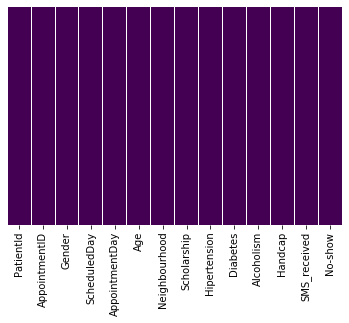

In [61]:
sns.heatmap(medical.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [62]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


***Also, from the above '.info' command, we see that the data types for few of the variables are not correct.***
> * ScheduledDay should be Date
> * AppointmentDay should be Date
> * Handicap should be converted to dummies as it has more than 2 categories within it. But we will skip that for now as we are not doing any Regression Analysis of sorts.

***Next we check if their are any 'Duplicate' entries or not. This is to make sure that the data was collected for every unique instances only. There are possibilities that the same patient ID may appear again, but as long as the appointment is done on a different day for a different reason, we are good.***
> * As we see in the following result, there are not duplicate entries when we look at all the columns together.

In [63]:
medical[medical.duplicated(keep = False)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [64]:
medical.duplicated().sum()

0

***Next we explore our dataset a bit more.***

In [65]:
medical.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> * From the above command, we can see that there are approximately 20% of the people in the dataset that have Hipertension, 7% have Diabetes, and 3% are Alcoholic. 10% have Scholarships.

> * *For our analysis, we won't be needing all the variables in the dataset. So going forward, we will remove few of the columns that are of no use to us.*

> * *Also, we will be adding few new columns that provide us with the 'Date' item as to when the Appoinment was booked and for what day.*

## Data Cleaning

***We will start by removing columns that we are not going to use.***

In [66]:
medical.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)
medical.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


> * We don't need the **ID** of the patients or the Appointment to do our exploratory analysis. Also, the reason I removed **'Neighbourhood'** was that it had too many categories, 81 to be precise, and plotting that on a graph could become messy. Hence, though it is good for future analysis, it is not what I would be looking into at this stage.

***Checking 'Age' values for any wrong entry.***

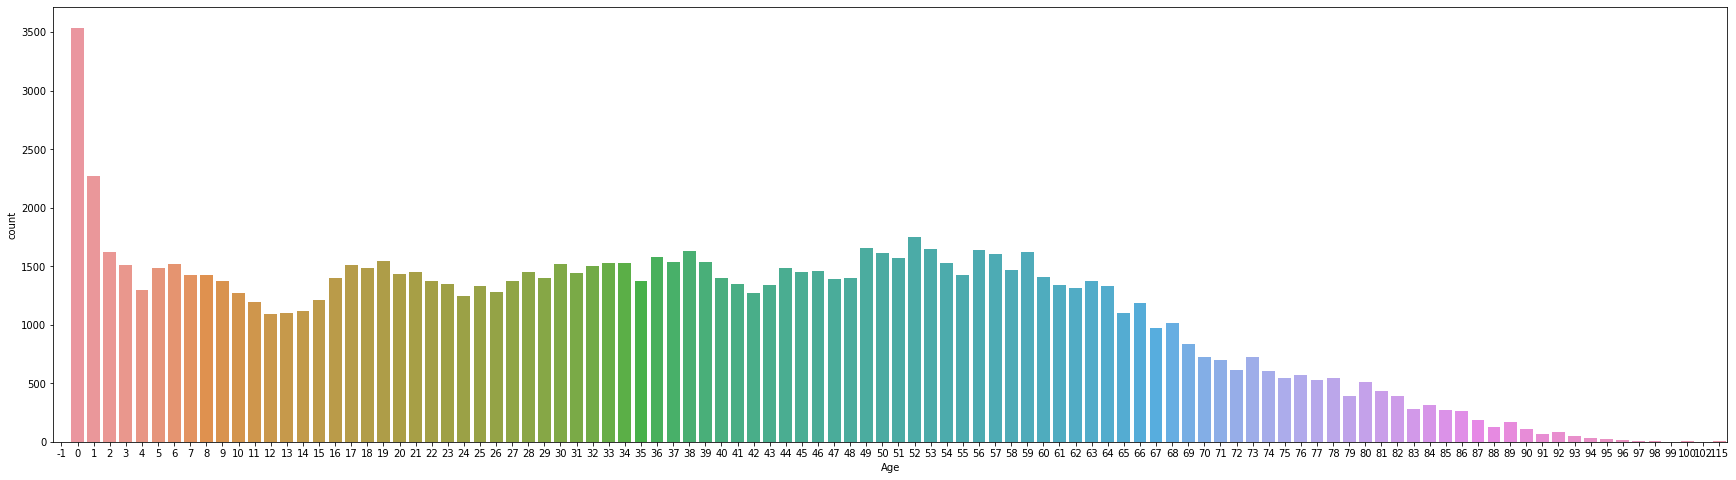

In [67]:
fig, axes = plt.subplots(1,1, figsize=(30,8))
sns.countplot(x= 'Age', data = medical)

In [68]:
medical[medical['Age']<0] ### There appears to be a Negative age. This can't be right.

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,0,0,0,0,0,0,No


In [69]:
medical.drop(labels=99832, axis =0, inplace =True) ### Dropping that row of negative age.


In [70]:
medical[medical['Age'] == -1] ### Checking if it is removed or not

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


***Now we will add few new columns for our analysis. This process is as follows:***

> * Step 1: The process will apply to **'ScheduleDay' and 'AppointmentDay'** columns only
> * Step 2: We will first convert the data type **'Object'** to data type **'datetime'**
> * Step 3: We will then create 'NEW' columns **(ScheduleDate & AppointmentDate)** that will ONLY have the **'Date'** element of the variable.
> * Step 4: Then we will create a column **'DaysToAppointment'** that will be the difference in 'Days' from the appointment made to the day of the appoinment.
> * Step 5: Finally we will drop the 'Initial' columns as they will be of no use to us.

In [71]:
medical['ScheduledDay'] = pd.to_datetime(medical['ScheduledDay'])
medical['ScheduleDate'] = medical['ScheduledDay'].dt.date ### Extracting 'Date' from the value

In [72]:
medical['AppointmentDay'] = pd.to_datetime(medical['AppointmentDay'])
medical['AppointmentDate'] = medical['AppointmentDay'].dt.date ### Extracting 'Date' from the value

In [73]:
medical['DaysToAppointment'] = (medical['AppointmentDate'] - medical['ScheduleDate']) ### New Column for Difference in Days

In [74]:
medical['DaysToAppointment'] = medical['DaysToAppointment'].astype('timedelta64[D]').astype(int) ### Setting the right Data Type

In [75]:
medical.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleDate,AppointmentDate,DaysToAppointment
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0


In [76]:
medical.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True) ### Dropping the columns of no use

> * Rearranging the columns:

In [77]:
medical.columns


Index(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'ScheduleDate',
       'AppointmentDate', 'DaysToAppointment'],
      dtype='object')

In [78]:
medical = medical[['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes','Alcoholism', 'Handcap', 'SMS_received', 'ScheduleDate',
       'AppointmentDate', 'DaysToAppointment', 'No-show']] ### Re arranging the columns

In [79]:
medical.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduleDate,AppointmentDate,DaysToAppointment,No-show
0,F,62,0,1,0,0,0,0,2016-04-29,2016-04-29,0,No
1,M,56,0,0,0,0,0,0,2016-04-29,2016-04-29,0,No
2,F,62,0,0,0,0,0,0,2016-04-29,2016-04-29,0,No
3,F,8,0,0,0,0,0,0,2016-04-29,2016-04-29,0,No
4,F,56,0,1,1,0,0,0,2016-04-29,2016-04-29,0,No


***Checking 'DaysToAppointment' values for any wrong entry.***



(0, 45)

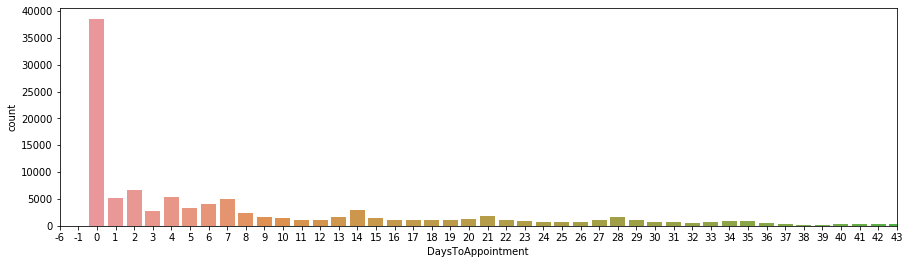

In [80]:
fig, axes = plt.subplots(1,1, figsize=(15,4))
sns.countplot(x= 'DaysToAppointment', data = medical)
plt.xlim(0, 45)

In [81]:
medical[medical['DaysToAppointment']<0] ### It seems that there are few wrong entries.

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduleDate,AppointmentDate,DaysToAppointment,No-show
27033,M,38,0,0,0,0,1,0,2016-05-10,2016-05-09,-1,Yes
55226,F,19,0,0,0,0,1,0,2016-05-18,2016-05-17,-1,Yes
64175,F,22,0,0,0,0,0,0,2016-05-05,2016-05-04,-1,Yes
71533,F,81,0,0,0,0,0,0,2016-05-11,2016-05-05,-6,Yes
72362,M,7,0,0,0,0,0,0,2016-05-04,2016-05-03,-1,Yes


In [82]:
medical.drop(labels=[27033,55226,64175,71533,72362], axis =0, inplace =True) ### Dropping all the respective rows.

In [83]:
medical[medical['DaysToAppointment'] < 0] ### Checking if it is removed or not

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduleDate,AppointmentDate,DaysToAppointment,No-show


> * Also, we will not be making anymore structural changes in the data frame as we have all the information that we need for the Exploratory Analysis.
> * We will not be adding new columns for the **'Handcap'** columns as it is not necessary from the Exploratory analysis point of view.
> * **Final Point**: All our data looks complete for the Exploratory Analysis that we will carry out next.

In [84]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
Gender               110521 non-null object
Age                  110521 non-null int64
Scholarship          110521 non-null int64
Hipertension         110521 non-null int64
Diabetes             110521 non-null int64
Alcoholism           110521 non-null int64
Handcap              110521 non-null int64
SMS_received         110521 non-null int64
ScheduleDate         110521 non-null object
AppointmentDate      110521 non-null object
DaysToAppointment    110521 non-null int64
No-show              110521 non-null object
dtypes: int64(8), object(4)
memory usage: 11.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis
>

***Let us look at the correlation matrix to decide which variables to explore further***

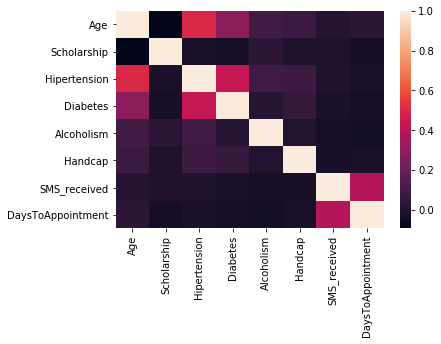

In [85]:
sns.heatmap(medical.corr())

> * It seems that there is a strong correlation between Age and Hipertension. Nothing else really stands out.

***Now, I will plot 'Age' and 'Days to Appointments' as I feel that they can affect whether a person shows up for appointment or not. Also, we have distributed them based on the 'Gender'.***

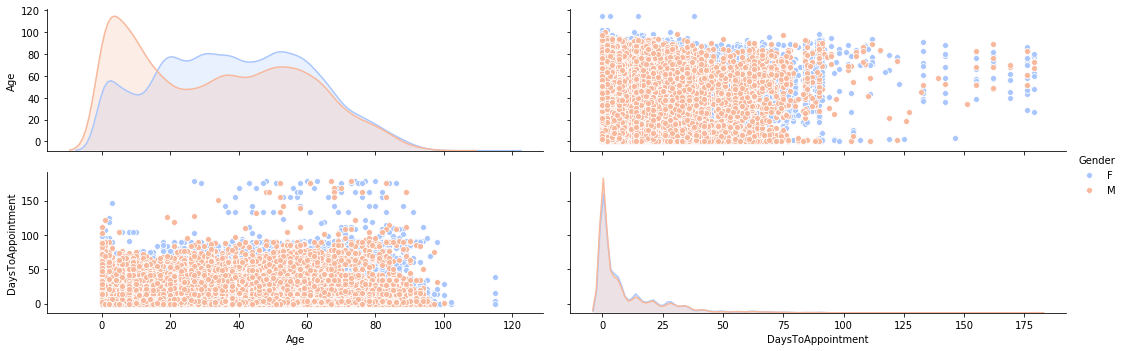

In [86]:
sns.pairplot(medical, hue = 'Gender', vars=["Age", "DaysToAppointment"], palette = 'coolwarm', aspect = 3)

> * It seems like there are more **Females** than men who are likely to **Book an appointment** in advance. But as these numbers are well above **70 Days**, they cannot be trusted for a generalization.
> * Also, there are more **younger** Males who tend to visit the clinics than Female.
> * We will now explore 'DaysToAppointments', 'Age', and other variables in the following graphs with 'No-show'

### Research Question 1 : How does Days To Appointment affect the 'No-Show' result ?

> * *What I am trying to achieve here is to get a relationship between the **'No-Show'** and the Time between the 'Appointment **Booked**' & 'Actual **'Appoinment Date'**.*
> * I have used the Seaborn library to plot the distribution of Number of Days to Appointments for 'No-Show and Show'
> * I have kept the graph distribution to **30 Days** for a better visualization and have also adjusted the Graph size.

In [87]:
def plot_bars(df, x_col, hue_col, xlabel, ylabel, title):
    fig, axes = plt.subplots(1,1, figsize=(20,6))
    sns.countplot(x= x_col, hue = hue_col, data = df)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.title(title, fontsize = 20)

(-1, 30)

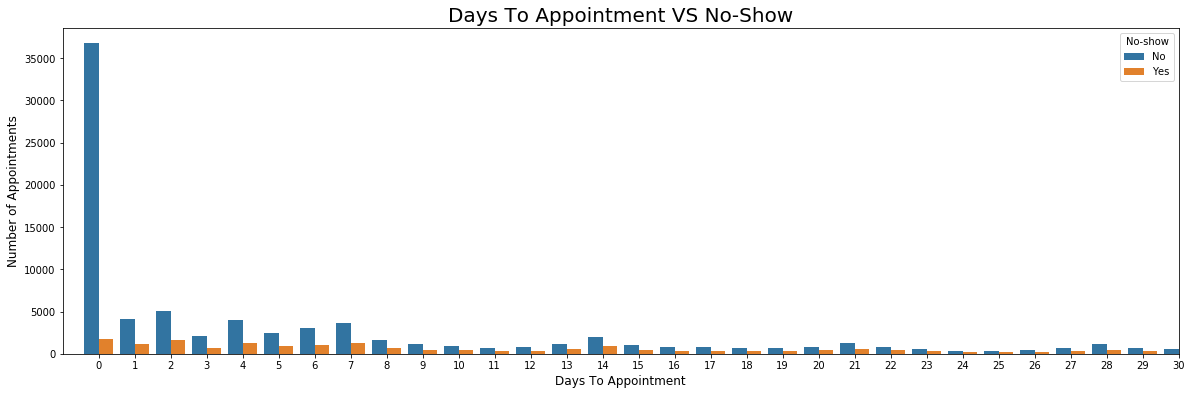

In [88]:
plot_bars(medical, 'DaysToAppointment', 'No-show', 'Days To Appointment', 'Number of Appointments', 'Days To Appointment VS No-Show')
plt.xlim(-1, 30)

**The following observations can be obtained from the graph above:**

> * There are more people who **book** the Appointment on the **same day** when they actually want to visit the doctor. This can also be due to the fact that any particcular clinic allow for the **walk-in** check-up as well.
> * People who visit on the same day of their appointment are more likely **not to miss** their appointment as compared to the rest of the people.
> * People who book their appointment **1 to 8 days** in advance are more likely to **not Show up** for their appointment when compared to people who book their appointments **8+ days** in advance.

### Research Question 2  : Relation between Age and Hipertension

> * *What I am trying to achieve here is to get a relationship between the **'Age'** and the **Hipertension**
> * I have used the Seaborn library to plot the distribution of Age of the patient and whether they have Hipertension or not.
> * I have kept the graph distribution from **15 years Age** to **90 years Age** for a better visualization and have also adjusted the Graph size.

(0, 2000)

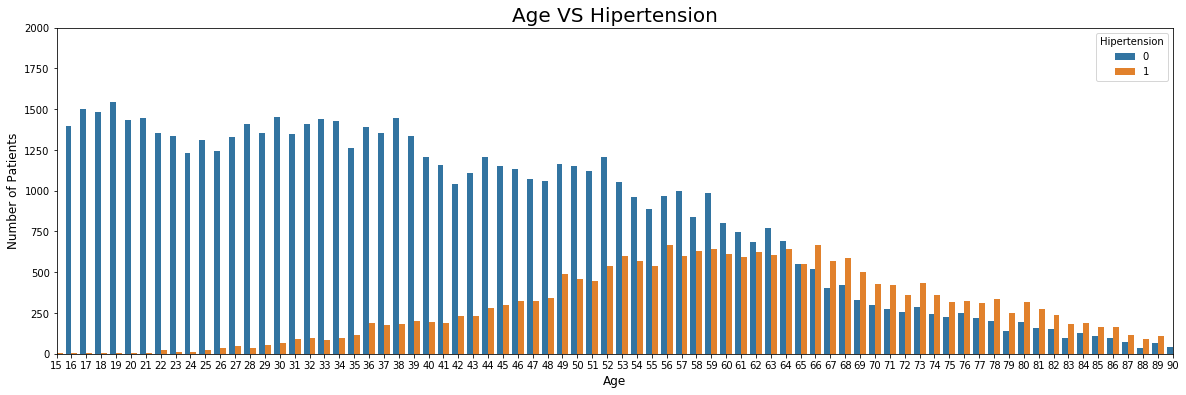

In [89]:
plot_bars(medical, 'Age', 'Hipertension', 'Age', 'Number of Patients', 'Age VS Hipertension')
plt.xlim(15, 90)
plt.ylim(0,2000)

**The following observations can be obtained from the graph above:**

> * The current data set has more people who are **Age < 55 years**
> * Also, It seems that people who are older tend to have **Hipertension** as compared to those who are younger
> * The trend of **Hipertension** increases with the increase in Age and is found to be maximum among people who are in the range of **50 and above Years**

### Research Question 3  : How does Age affect the 'No-Show' result ?

> * *What I am trying to achieve here is to get a relationship between the **Age** and the **No-show**. Do people of certain age tend to not attend their appointments frequently?
> * I have used the Seaborn library to plot the distribution of Age of the patient and whether they have Hipertension or not.
> * I have kept the graph distribution from **0 years Age** to **75 years Age** for a better visualization and have also adjusted the Graph size.

(-1, 75)

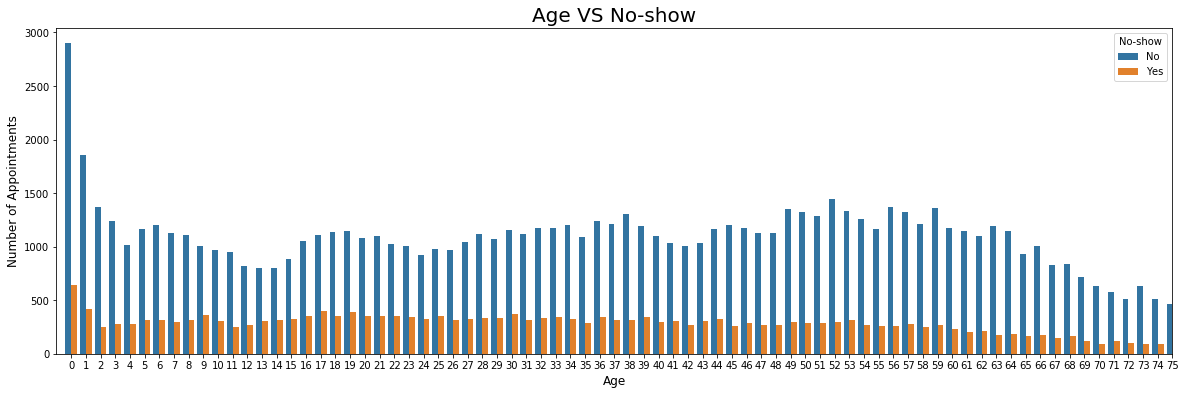

In [90]:
plot_bars(medical, 'Age', 'No-show', 'Age', 'Number of Appointments', 'Age VS No-show')
plt.xlim(-1, 75)

**The following observations can be obtained from the graph above:**

> * There are more younger people who visit the clinics who are less likely to not show up for their appointments.

### Research Question 4  : Relation between Gender and No-show

Text(0.5, 1.0, 'Gender VS No-show')

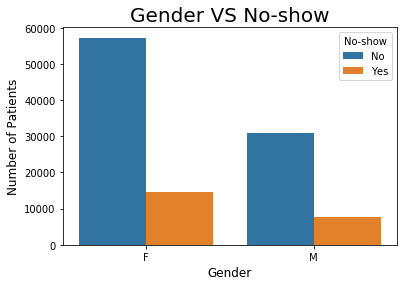

In [91]:
sns.countplot(x= 'Gender', hue = 'No-show', data = medical)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Number of Patients', fontsize = 12)
plt.title('Gender VS No-show', fontsize = 20)

**The following observations can be obtained from the graph above:**

> * It seems that there are more **Females** than Men who **Visit** the clinics.
> * Also, just by a visual check, **Females** are less likely to **skip** their appointment than men.

<a id='conclusions'></a>
## Conclusions

> Conclusion 1: There are more **Females** who visit the clinics than men. Females are more likely to show-up for an appointment than Men. Hence, it would be great for a clinic to promote its offering and prioritize **Females** clients than **men**

> Conclusion 2: There are more younger patients that visit clinics. Hence, they form the second biggest segment group after the **Females**. Clinics should promote and offer services that are more relevant to these kids as well.

> Conclusion 3: Patients are less likely to cancel appointments if the appointment is booked on the same day or if the patients just comes in for a "walk-in' appointment. Hence, clinics should account for these patients as they are the main source of revenue generation.

> Conclusion 4: Clinics should also provide additional (maybe complimentary) services related to **Hipertension** to people between **50 and above years** of age as they are most likely to suffer from **Hipertension**

## Limitations

> There is always a possibility to do something extra. I have listed down few things that could have been looked into in detail:

> * Relationships between **'Diabetes, Alcoholism, Handcap, SMS_received'** were done against **'No-show'**. There results were not that significant or did not show any strong patterns that were worthy of exploring any further. Hence, the relationshps were not shown in the graphs above.
> * There is no detail provided of the person accompanying the **patients** who are less than **18 years old**. Hence, the proper trend of **no-show**, that depends on the person who brings the kid to the clininc, cannot be provided just based on the data available. We can only analyse based on the 'Patient data' here.
> * We can further dig deep into the 'DaysToAppointment == 0' and see whether the patients coming for the check consist of 'Kids' or adults as it would make sense for any parents to not **skip** an appointment for their **5 year old** kid
